# Pymaceuticals Inc.
---

### Analysis

* The bar chart showed Drug Regimen Capomolin has the maximum mice number. By removing duplicates the total number of 
  mice is 248. 
* The pie chart showed the distribution of male vs female mice is almost perfect.
* The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, when the
  mouse weight increases the average tumor volume also increases.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
pre_drop_mouse_count = len(merged_df["Mouse ID"].unique())
pre_drop_mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dups_mice_df = merged_df.loc[merged_df["Mouse ID"] == "g989", :]
dups_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
mouse_df = mouse_df[mouse_df["Mouse ID"] != "g989"]
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(mouse_df["Mouse ID"].unique())
clean_mice_count

248

## Summary Statistics

   Summary statistics includes:
    
   * A row for each drug regimen. These regimen names should be contained in the index column
   * A column of each of the following statistics:mean, median, variance, standard deviation, and SEM of the tumor volume.

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = mouse_df['Tumor Volume (mm3)'].groupby(mouse_df['Drug Regimen']).mean()
median = mouse_df['Tumor Volume (mm3)'].groupby(mouse_df['Drug Regimen']).median()
var = mouse_df['Tumor Volume (mm3)'].groupby(mouse_df['Drug Regimen']).var()
std = mouse_df['Tumor Volume (mm3)'].groupby(mouse_df['Drug Regimen']).std()
sem = mouse_df['Tumor Volume (mm3)'].groupby(mouse_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stat_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                                "Median Tumor Volume":median, 
                                "Tumor Volume Variance":var, 
                                "Tumor Volume Std. Dev.":std, 
                                "Tumor Volume Std. Err.":sem})

summary_stat_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
my_stat = ['mean', 'median', 'var', 'std', 'sem']
summary_agg_df =  mouse_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(my_stat)

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

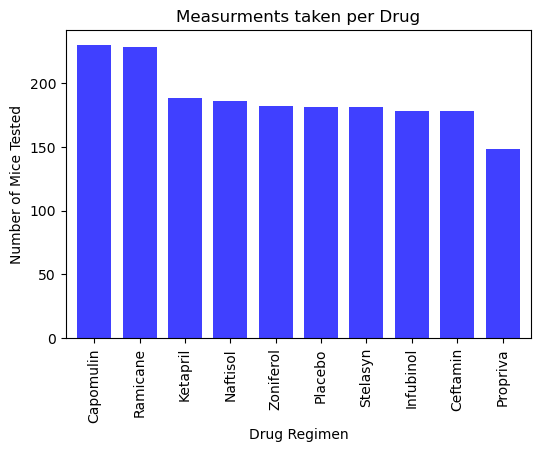

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count = mouse_df["Drug Regimen"].value_counts()

#Pandas Bar Chart: Total Measurements Count
plot_pandas = mice_count.plot(kind="bar",color='b', title="Measurments taken per Drug",
                              alpha=.75, width=.75, figsize=(6,4))

plot_pandas.set_xlabel("Drug Regimen")
plot_pandas.set_ylabel("Number of Mice Tested")  

plt.show()  
           


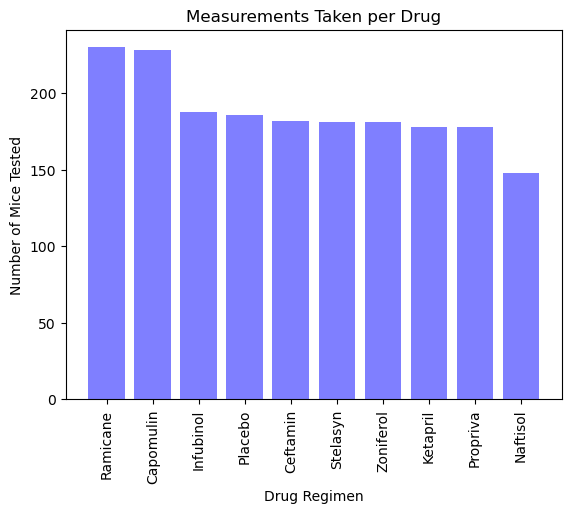

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

x_axis = np.arange(0, len(drug))
tick_locations = []
for x in x_axis:
  tick_locations.append(x)
  
plt.title("Measurements Taken per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.bar(x_axis, mice_count, color="b", alpha=0.5, align="center")
plt.xticks(tick_locations, drug, rotation='vertical')
plt.show()



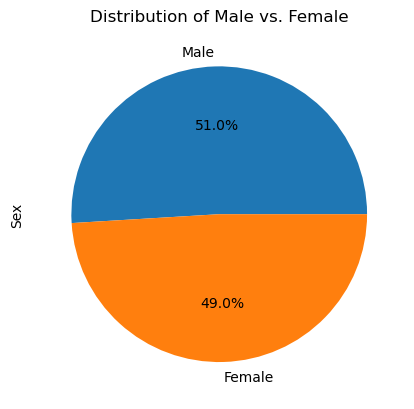

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = mouse_df[ "Sex"].value_counts()

gender_pie = gender_count.plot(kind="pie",title="Distribution of Male vs. Female", autopct="%1.1f%%")
gender_pie.set_ylabel("Sex")

plt.show()


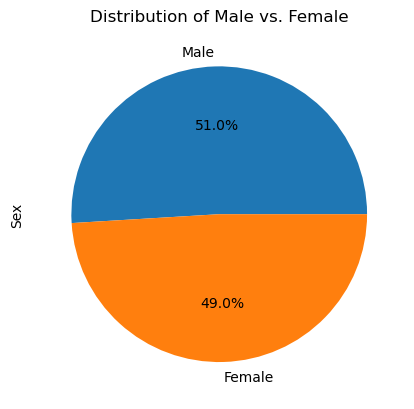

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Male", "Female"]
count = gender_count
plt.pie(count, labels=gender, autopct="%1.1f%%")
plt.title("Distribution of Male vs. Female")
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_capomulin = mouse_df.loc[mouse_df["Drug Regimen"]== "Capomulin"]
drug_ramicane = mouse_df.loc[mouse_df["Drug Regimen"]== "Ramicane"]
drug_infubinol = mouse_df.loc[mouse_df["Drug Regimen"]== "Infubinol"]
drug_ceftamin = mouse_df.loc[mouse_df["Drug Regimen"]== "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulin_last = drug_capomulin.groupby("Mouse ID").max()["Timepoint"]
capomulin_df = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_df, mouse_df, on=("Mouse ID", "Timepoint"), how="left")
capomulin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [14]:
#Capomulin quartiles and IQR
#Determine outliers using upper and lower bounds

capomulin_tumors = capomulin_merge["Tumor Volume (mm3)"]

quartiles = capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors is: {lowerq}")
print(f"The upper quartile of Capomulin tumors is: {upperq}")
print(f"The interquartile range of Capomulin tumors is: {iqr}")
print(f"The the median of Capomulin tumors is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of Capomulin tumors is: 32.37735684
The upper quartile of Capomulin tumors is: 40.1592203
The interquartile range of Capomulin tumors is: 7.781863460000004
The the median of Capomulin tumors is: 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [15]:
# Ramicane - last (greatest) timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
ramicane_last = drug_ramicane.groupby('Mouse ID').max()['Timepoint']
ramicane_df = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_last, mouse_df, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [16]:
# Ramicane quartiles and IQR
# Determine outliers using upper and lower bounds
ramicane_tumors = ramicane_merge["Tumor Volume (mm3)"]

quartiles = ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The the median of Ramicane tumors is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The the median of Ramicane tumors is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [17]:
# Infubinol - last (greatest) timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
infubinol_last = drug_infubinol.groupby('Mouse ID').max()['Timepoint']
infubinol_df = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_last, mouse_df, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [18]:
# Infubinol quartiles and IQR
# Determine outliers using upper and lower bounds
infubinol_tumors = infubinol_merge["Tumor Volume (mm3)"]

quartiles = infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The the median of Infubinol tumors is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The the median of Infubinol tumors is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [19]:
# Ceftamin - last (greatest) timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
ceftamin_last = drug_ceftamin.groupby('Mouse ID').max()['Timepoint']
ceftamin_df = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_last, mouse_df, on=("Mouse ID","Timepoint"),how="left")


In [20]:
# Ceftamin quartiles and IQR
# Determine outliers using upper and lower bounds
ceftamin_tumors = ceftamin_merge["Tumor Volume (mm3)"]

quartiles = ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin tumors is: {lowerq}")
print(f"The upper quartile of Ceftamin tumors is: {upperq}")
print(f"The interquartile range of Ceftamin tumors is: {iqr}")
print(f"The the median of Ceftamin tumors is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors is: 48.72207785
The upper quartile of Ceftamin tumors is: 64.29983003
The interquartile range of Ceftamin tumors is: 15.577752179999997
The the median of Ceftamin tumors is: 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


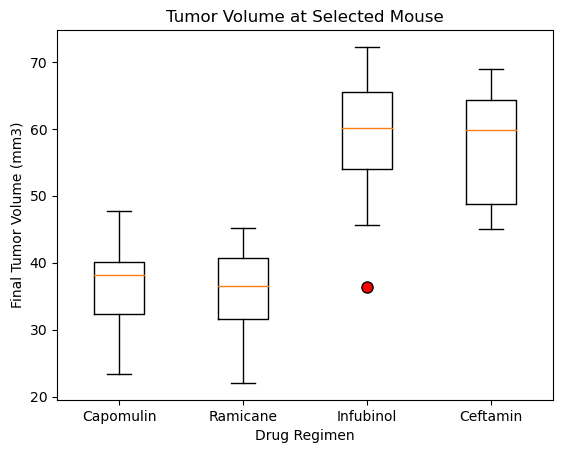

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
flierprops = dict(marker='o', markersize=8, markerfacecolor='r', markeredgecolor='k')
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, vert=True,flierprops = flierprops)
plt.show()


## Recalculating Quartiles, Outliers and Box Plot using for loop

In [22]:
# Maximum Tumor Volume by Drug
# Start by getting the last (greatest) timepoint for each mouse
max_tumor_vol = mouse_df.groupby(["Mouse ID"]).max()["Timepoint"]
max_tumor_vol

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [23]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_merge = pd.merge(max_tumor_vol, mouse_df, on=('Mouse ID', 'Timepoint'), how="left")
max_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

for treatment in treatments:
    treatment_list = max_merge.loc[max_merge["Drug Regimen"]==treatment, "Tumor Volume (mm3)"]
    tumor_vol_list.append(treatment_list)
    quartiles = treatment_list.quantile([.25,.5,.75])
    lowerq = quartiles.loc[0.25]
    upperq = quartiles.loc[0.75]
    iqr = upperq-lowerq
    
    print(f"{treatment} Data: ")
    print(f"The lower quartile of {treatment} is: {lowerq}")
    print(f"The upper quartile of {treatment} is: {upperq}")
    print(f"The interquartile range of {treatment} is: {iqr}")
    print(f"The the median of {treatment} is: {quartiles.loc[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers. '\n'")
    


Capomulin Data: 
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers. '
'
Ramicane Data: 
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers. '
'
Infubinol Data: 
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers. '
'
Ceftamin Data: 
The lower quartile of Ceftamin is: 48.

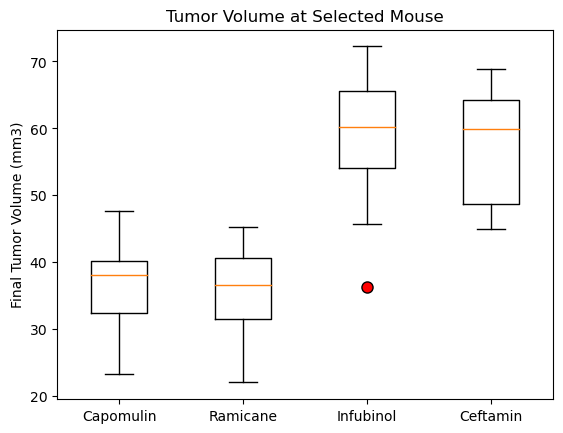

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

flierprops = dict(marker='o', markersize=8, markerfacecolor='r', markeredgecolor='k')
plt.boxplot(tumor_vol_list, flierprops = flierprops)
plt.title('Tumor Volume at Selected Mouse')
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()


## Line and Scatter Plots

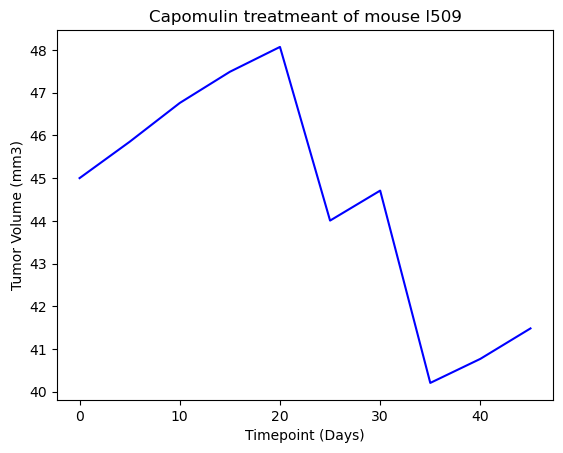

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_filter = drug_capomulin.loc[drug_capomulin["Mouse ID"] == "l509"]
mouse_filter.head()

x_axis = mouse_filter["Timepoint"]
y_axis = mouse_filter["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis,y_axis, color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()



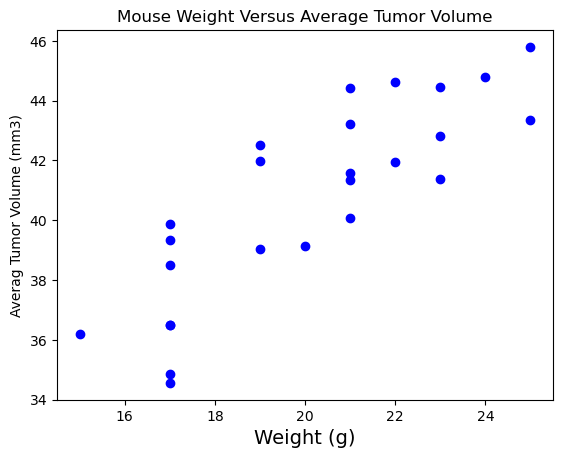

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_tumor_vol = drug_capomulin.groupby(["Mouse ID"]).mean()

plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


The correlation between mouse weight and the average tumor volume is 0.84


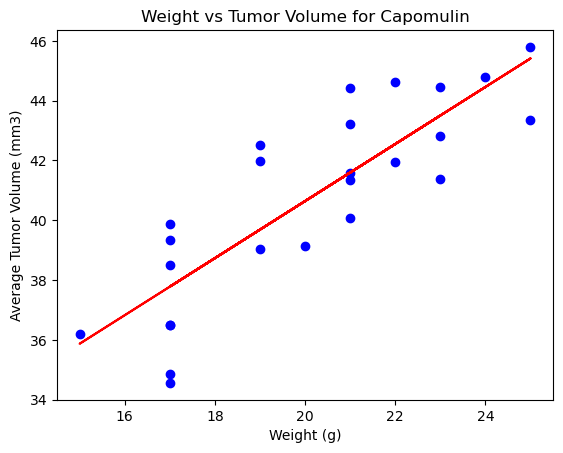

In [29]:
# Add the linear regression equation and line to plot
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_tumor_vol["Weight (g)"],avg_tumor_vol["Tumor Volume (mm3)"])
regress_values= avg_tumor_vol["Weight (g)"]* slope + intercept

plt.scatter(avg_tumor_vol["Weight (g)"],avg_tumor_vol["Tumor Volume (mm3)"],color='b')
plt.plot(avg_tumor_vol["Weight (g)"], regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")

plt.show()
